# MLD plot with accessing data through Opendap

In [17]:
import os
import time
import xarray as xr
import pandas as pd
import getpass
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import ftplib

USERNAME = getpass.getpass('Enter your username: ')
PASSWORD = getpass.getpass('Enter your password: ')

# Output directory (will be created if doesn't exist)
OUTDIR = '/data/users/cpequign/project/MLD_WG'
# Connect to FTP Server ([nrt/my].cmems-du.eu)
HOSTNAME = 'nrt.cmems-du.eu'
# Variable you want to download
VARIABLE = 'mlotst'
START_DATE = '2021-10-01'
END_DATE = '2022-03-30'
# Optional: to do a geographical subset, replace 'False' by 'True'
GEO_SUBSET = True
LAT_MIN = 50.4
LAT_MAX = 50.6
LON_MIN = -16.0
LON_MAX = -2.0

Enter your username: ········
Enter your password: ········


### Load the datasets

In [13]:
####IBI
IBI_PROD = 'IBI_ANALYSISFORECAST_PHY_005_001-TDS'  # Product ID not actually needed here
IBIdm_ID = 'cmems_mod_ibi_phy_anfc_0.027deg-3D_P1D-m'  # Dataset ID

#####AMM15
AMM15_PROD='NORTHWESTSHELF_ANALYSIS_FORECAST_PHY_004_013-TDS'   
AMM15dm_ID='MetO-NWS-PHY-dm-MLD'    
AMM15hi_ID='MetO-NWS-PHY-hi-MLD'   

####AMM7dm
AMM7_PROD='NWSHELF_ANALYSISFORECAST_PHY_LR_004_001-TDS'    
AMM7dm_ID='cmems_mod_nws_phy-mld_anfc_7km-2D_P1D-m'    

####### PSY4 
PSY4_PROD='GLOBAL_ANALYSIS_FORECAST_PHY_001_024-TDS'    
PSY4dm_ID='global-analysis-forecast-phy-001-024'    

###### MOB
MOB_PROD='MULTIOBS_GLO_PHY_TSUV_3D_MYNRT_015_012-TDS'    
MOBwk_ID='dataset-armor-3d-nrt-weekly' 

# Read product via OPeNDAP - Subset through a period of time and lat, lon
AMM15hi = xr.open_dataset(f'https://{USERNAME}:{PASSWORD}@{HOSTNAME}/\
thredds/dodsC/{AMM15hi_ID}').sel(time=slice(START_DATE, END_DATE), lat = slice(LAT_MIN,LAT_MAX), lon = slice(LON_MIN,LON_MAX))

AMM15dm = xr.open_dataset(f'https://{USERNAME}:{PASSWORD}@{HOSTNAME}/\
thredds/dodsC/{AMM15dm_ID}').sel(time=slice(START_DATE, END_DATE), lat = slice(LAT_MIN,LAT_MAX), lon = slice(LON_MIN,LON_MAX))
# Change dimensions names for AMM15 for consistency
for coords in AMM15hi.coords:
    if coords=='lon':
        AMM15hi = AMM15hi.rename({'lon':'longitude'})
    if coords=='lat':
        AMM15hi = AMM15hi.rename({'lat':'latitude'})
for coords in AMM15dm.coords:
    if coords=='lon':
        AMM15dm = AMM15dm.rename({'lon':'longitude'})
    if coords=='lat':
        AMM15dm = AMM15dm.rename({'lat':'latitude'})

AMM7dm = xr.open_dataset(f'https://{USERNAME}:{PASSWORD}@{HOSTNAME}/\
thredds/dodsC/{AMM7dm_ID}').sel(time=slice(START_DATE, END_DATE), latitude = slice(50,51), longitude = slice(LON_MIN,LON_MAX))

PSY4dm = xr.open_dataset(f'https://{USERNAME}:{PASSWORD}@{HOSTNAME}/\
thredds/dodsC/{PSY4dm_ID}').sel(time=slice(START_DATE, END_DATE), latitude = slice(LAT_MIN,LAT_MAX), longitude = slice(LON_MIN,LON_MAX))

IBIdm = xr.open_dataset(f'https://{USERNAME}:{PASSWORD}@{HOSTNAME}/\
thredds/dodsC/{IBIdm_ID}').sel(time=slice(START_DATE, END_DATE), latitude = slice(50,51), longitude = slice(LON_MIN,LON_MAX))

MOBwk = xr.open_dataset(f'https://{USERNAME}:{PASSWORD}@{HOSTNAME}/\
thredds/dodsC/{MOBwk_ID}').sel(time=slice(START_DATE, END_DATE), latitude = slice(50,51), longitude = slice(LON_MIN+360,LON_MAX+360))

#### points of interest

In [14]:
AMM15hi_8Wind = (np. abs(AMM15hi.longitude + 8)). argmin()
AMM15dm_8Wind = (np. abs(AMM15dm.longitude + 8)). argmin()
AMM7dm_8Wind = (np. abs(AMM7dm.longitude + 8)). argmin()
PSY4dm_8Wind = (np. abs(PSY4dm.longitude + 8)). argmin()
IBIdm_8Wind = (np. abs(IBIdm.longitude + 8)). argmin()
MOBwk_8Wind = (np. abs(MOBwk.longitude + 8-360)). argmin()

AMM15hi_50N5ind = (np. abs(AMM15hi.latitude - 50.5)). argmin()
AMM15dm_50N5ind = (np. abs(AMM15dm.latitude - 50.5)). argmin()
AMM7dm_50N5ind = (np. abs(AMM7dm.latitude - 50.5)). argmin()
PSY4dm_50N5ind = (np. abs(PSY4dm.latitude - 50.5)). argmin()
IBIdm_50N5ind = (np. abs(IBIdm.latitude - 50.5)). argmin()
MOBwk_50N5ind = (np. abs(MOBwk.latitude - 50.5)). argmin()

#### Zonal plot

Text(0.5, 0, 'Longitude')

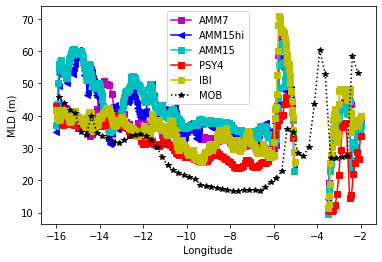

In [15]:
plt.figure()
plt.plot(AMM7dm.longitude,AMM7dm.mlotst[0,AMM7dm_50N5ind,:],'ms-',label='AMM7')
plt.plot(AMM15hi.longitude,AMM15hi.mlotst[0,AMM15hi_50N5ind,:],'b<-',label='AMM15hi')
plt.plot(AMM15dm.longitude,AMM15dm.mlotst[0,AMM15dm_50N5ind,:],'cs-',label='AMM15')
plt.plot(PSY4dm.longitude,PSY4dm.mlotst[0,PSY4dm_50N5ind,:],'rs-',label='PSY4')
plt.plot(IBIdm.longitude,IBIdm.mlotst[0,IBIdm_50N5ind,:],'ys-',label='IBI')
plt.plot(MOBwk.longitude-360,MOBwk.mlotst[0,MOBwk_50N5ind,:],'k*:',label='MOB')
plt.ylabel('MLD (m)')
plt.legend()
plt.xlabel('Longitude')

#### Time series plot

Text(0, 0.5, 'MLD (m)')

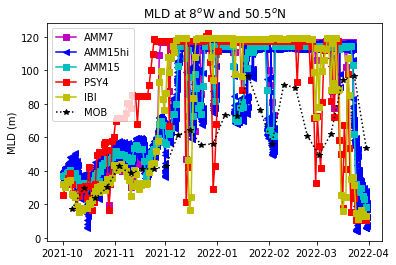

In [10]:
plt.figure()
plt.plot(AMM7dm.time,AMM7dm.mlotst[:,AMM7dm_50N5ind,AMM7dm_8Wind],'ms-',label='AMM7')
plt.plot(AMM15hi.time,AMM15hi.mlotst[:,AMM15hi_50N5ind,AMM15hi_8Wind],'b<-',label='AMM15hi')
plt.plot(AMM15dm.time,AMM15dm.mlotst[:,AMM15dm_50N5ind,AMM15dm_8Wind],'cs-',label='AMM15')
plt.plot(PSY4dm.time,PSY4dm.mlotst[:,PSY4dm_50N5ind,PSY4dm_8Wind],'rs-',label='PSY4')
plt.plot(IBIdm.time,IBIdm.mlotst[:,IBIdm_50N5ind,IBIdm_8Wind],'ys-',label='IBI')
plt.plot(MOBwk.time,MOBwk.mlotst[:,MOBwk_50N5ind,MOBwk_8Wind],'k*:',label='MOB')

plt.title('MLD at 8$^o$W and 50.5$^o$N')
plt.legend()
plt.ylabel('MLD (m)')